---
title: DFT and Periodogram
---

In the last lecture, we looked at the sunspots dataset, and attempted to fit the simple sinusoidal model: 
\begin{equation*}
  y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t
\end{equation*}
with $\epsilon_t$ being i.i.d $N(0, \sigma^2)$. The important parameter in this model is $f$. To estimate $f$, our strategy was to minimize $RSS(f)$, which we computed for all values of $f$ in a grid taken over the range $[0, 0.5]$. 

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [30]:
#annual sunspots dataset:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
print(sunspots.head())
sunspots.columns = ['year', 'sunspotsmean', 'sunspotssd', 'sunspotsnobs', 'isdefinitive']
print(sunspots.head(10))

        0     1    2  3  4
0  1700.5   8.3 -1.0 -1  1
1  1701.5  18.3 -1.0 -1  1
2  1702.5  26.7 -1.0 -1  1
3  1703.5  38.3 -1.0 -1  1
4  1704.5  60.0 -1.0 -1  1
     year  sunspotsmean  sunspotssd  sunspotsnobs  isdefinitive
0  1700.5           8.3        -1.0            -1             1
1  1701.5          18.3        -1.0            -1             1
2  1702.5          26.7        -1.0            -1             1
3  1703.5          38.3        -1.0            -1             1
4  1704.5          60.0        -1.0            -1             1
5  1705.5          96.7        -1.0            -1             1
6  1706.5          48.3        -1.0            -1             1
7  1707.5          33.3        -1.0            -1             1
8  1708.5          16.7        -1.0            -1             1
9  1709.5          13.3        -1.0            -1             1


0     8.3
1    18.3
2    26.7
3    38.3
4    60.0
Name: sunspotsmean, dtype: float64


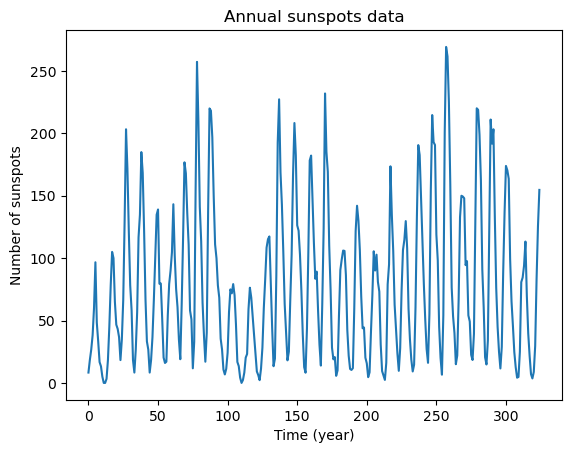

In [31]:
y = sunspots['sunspotsmean']
n = len(y)
print(y.head())
plt.plot(y)
plt.xlabel('Time (year)')
plt.ylabel('Number of sunspots')
plt.title('Annual sunspots data')
plt.show()

The RSS function that we used is given by: 

In [32]:
def rss(f):
    x = np.arange(1, n+1)
    xcos = np.cos(2 * np.pi * f * x)
    xsin = np.sin(2 * np.pi * f * x)
    X = np.column_stack([np.ones(n), xcos, xsin])
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    return rss

The following is the code for computing RSS over a grid of values of $f$. 

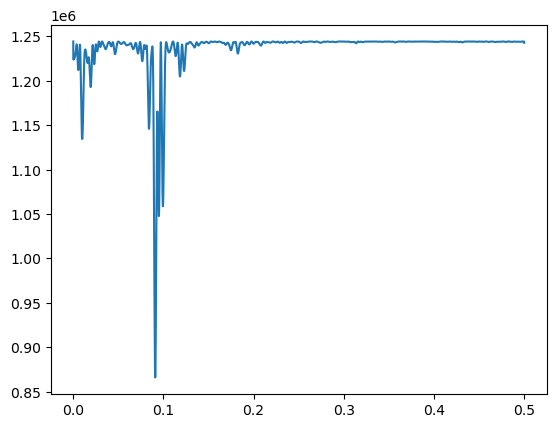

In [33]:
num_f_vals = 10000 #this is the number of different values of f we will try
allfvals = np.linspace(0, 0.5, num_f_vals)
rssvals = np.array([rss(f) for f in allfvals])
plt.plot(allfvals, rssvals)
plt.show()

Below we compute the estimate of $f$ by minimizing $RSS(f)$ over our grid. 

In [34]:
fhat = allfvals[np.argmin(rssvals)]
print(fhat)
print(1/fhat) #this is the estimated periodicity in years

0.09090909090909091
11.0


Now we repeat this exercise of estimation of $f$. But we restrict to Fourier frequencies (as opposed to a possibly finer grid of frequencies in $[0, 0.5]$), and then we use the connection between RSS at Fourier frequencies and the DFT, to compute RSS.

The formula connecting RSS and the DFT is the following. Suppose $f = j/n$ is a Fourier frequency lying strictly between 0 and $0.5$. Then: 
\begin{equation*}
   RSS(j/n) = \sum_t (y_t - \bar{y})^2 - 2 \frac{|b_j|^2}{n}
\end{equation*}
where $b_j$ is the $j$th DFT term given by 
\begin{equation*}
   b_j := \sum_{t=0}^{n-1} y_t \exp \left(-\frac{2 \pi i j t}{n} \right). 
\end{equation*}
The quantity $|b_j|^2/n$ is denoted by $I(j/n)$ and is called the periodogram: 
\begin{align*}
   I(j/n) := \frac{|b_j|^2}{n} ~~ \text{ for } 0 < \frac{j}{n} < 1/2. 
\end{align*}
Below we illustrate computation of $RSS(f)$ for Fourier frequencies in the range $(0, 1/2)$ using the above formula. 

In [35]:
#First form the set of Fourier frequencies
print(n)
#If n is odd, the Fourier frequencies in (0, 0.5) are 1/n, 2/n, ..., (n-1)/(2n)
m = (n-1) // 2
fourier_freq = (np.arange(1, m+1))/(n)
print(fourier_freq)

325
[0.00307692 0.00615385 0.00923077 0.01230769 0.01538462 0.01846154
 0.02153846 0.02461538 0.02769231 0.03076923 0.03384615 0.03692308
 0.04       0.04307692 0.04615385 0.04923077 0.05230769 0.05538462
 0.05846154 0.06153846 0.06461538 0.06769231 0.07076923 0.07384615
 0.07692308 0.08       0.08307692 0.08615385 0.08923077 0.09230769
 0.09538462 0.09846154 0.10153846 0.10461538 0.10769231 0.11076923
 0.11384615 0.11692308 0.12       0.12307692 0.12615385 0.12923077
 0.13230769 0.13538462 0.13846154 0.14153846 0.14461538 0.14769231
 0.15076923 0.15384615 0.15692308 0.16       0.16307692 0.16615385
 0.16923077 0.17230769 0.17538462 0.17846154 0.18153846 0.18461538
 0.18769231 0.19076923 0.19384615 0.19692308 0.2        0.20307692
 0.20615385 0.20923077 0.21230769 0.21538462 0.21846154 0.22153846
 0.22461538 0.22769231 0.23076923 0.23384615 0.23692308 0.24
 0.24307692 0.24615385 0.24923077 0.25230769 0.25538462 0.25846154
 0.26153846 0.26461538 0.26769231 0.27076923 0.27384615 0.276923

There is an inbuilt function in np for listing out all Fourier frequencies. This is the **np.fft.fftfreq(n)**. This gives all the frequencies $f$ for which $nf$ is an integer and for which $f \in [-0.5, 0.5)$ (there will be exactly $n$ of these frequencies in both cases where $n$ is odd or even). We will not work with negative frequencies so we will not use this function. 


In [ ]:
help(np.fft.fftfreq)

Below we compute the $RSS(f)$ for Fourier frequencies $f$ using our previous function rss. 

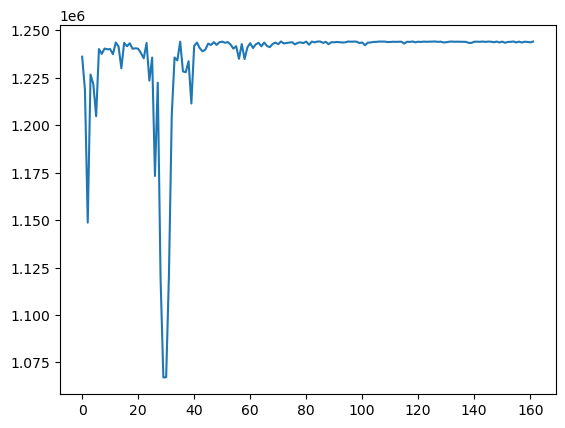

In [36]:
#let us compute rss(f) for f in the Fourier grid
rss_fourier = np.array([rss(f) for f in fourier_freq])
plt.plot(rss_fourier)
plt.show()

Next we compute the same thing using the DFT (calculated via the FFT), and its connection to the RSS. 

In [37]:
#Now we shall compute it using the FFT:
fft_y = np.fft.fft(y)
pgram_y = np.abs(fft_y[1:m + 1]) ** 2/n #we are picking up the entries 1,..,m of fft_y, then taking absolute values and squares, and then dividing by n
var_y = np.sum((y - np.mean(y)) ** 2) 
rss_fft = var_y - 2 * pgram_y

Below, we plot the two different calculations of $RSS(f)$ (for $f$ ranging among Fourier frequencies) on the same figure. We want to demonstrate the two calculations lead to identical answers. 

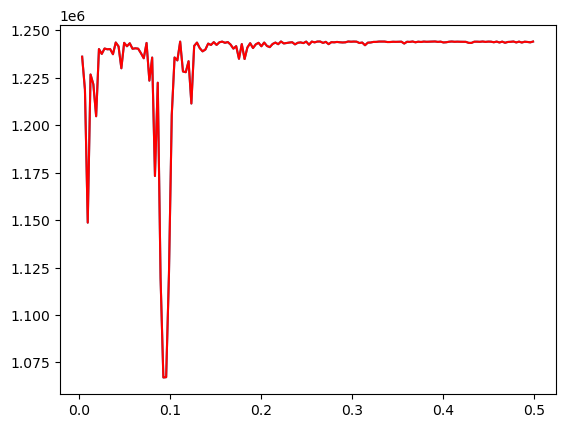

In [38]:
plt.plot(fourier_freq, rss_fourier)
plt.plot(fourier_freq, rss_fft, color = 'red')

The first method of directly computing $RSS(f)$ is actually quite computationally expensive. The second method (which leverages the connection to the Discrete Fourier Transform) is much more efficient because of the FFT algorithm. We shall illustrate this below using a very large audio dataset. 

## An Audio Dataset

The "Hear Piano Note - Middle C.mp3$ is an audio file consisting of about 14 seconds. It contains the sound of the Middle C note in the piano. The python library "Librosa" will be used for loading the audio file (see https://librosa.org/doc/latest/index.html for instructions on installing librosa, and tutorials etc.)

In [39]:
import librosa
y,sr=librosa.load("Hear Piano Note - Middle C.mp3")
n = len(y)
print(n)
print(sr)
print(n/sr)

301272
22050
13.66312925170068


Each second of the audio file is captured in $sr$ (which stands for "sampling rate" and whose default value is 22050) many datapoints. In other words, the unit of time for this dataset is $1/sr$. The total number of datapoints equals $sr$ muliplied by the number of seconds of the audio file. Clearly this is a time series dataset of a large size. The data (sound waveform) is plotted below.

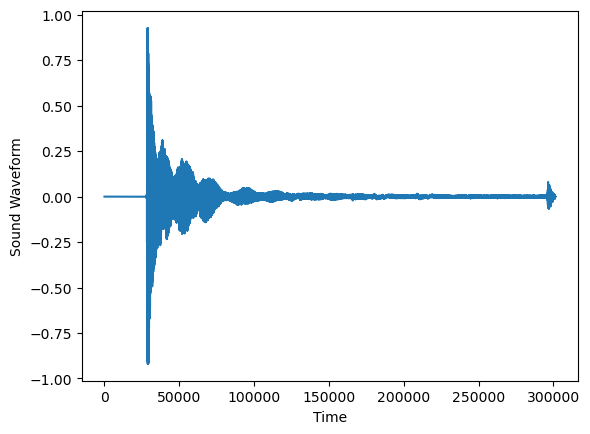

In [40]:
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Sound Waveform")
plt.show()

The full plot of the data is not very revealing as the data size is very long. But if we restrict to a smaller portion of the dataset, we can visualize the cyclical behavior more easily. 

Text(0, 0.5, 'Sound waveform')

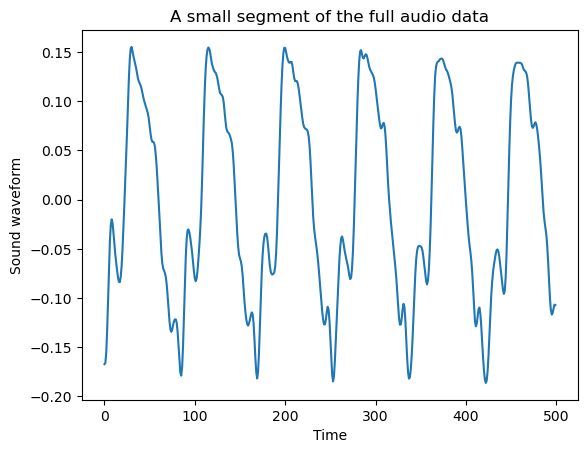

In [41]:
y_smallpart = y[50000:(50000 + 500)]
plt.plot(y_smallpart)
plt.xlabel('Time')
plt.title('A small segment of the full audio data')
plt.ylabel('Sound waveform')

Let us attempt to fit our simple sinusoidal model $y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin (2 \pi f t) + \epsilon_t$ to this dataset. The key is to calculate $RSS(f)$. If we try our first method of direct computation of $RSS(f)$ for each value of $f$ in a grid, it will be too slow because of the large size $n$. 

In [42]:
ngrid = 10000
allfvals = np.linspace(0, 0.5, ngrid)
rssvals = np.array([rss(f) for f in allfvals])
plt.plot(allfvals, rssvals)

KeyboardInterrupt: 

The above piece of code is taking too long to run. If we abandon it, and instead use the FFT-Periodogram connection to compute $RSS(f)$, the code runs way faster and gives the values of $RSS(f)$ on the Fourier grid which contains many more points than $10000$. 

In [43]:
fft_y = np.fft.fft(y)
m = (n // 2) - 1
fourier_freq = (np.arange(1, m+1))/(n)
pgram_y = (np.abs(fft_y[1:(m+1)]) ** 2)/n
var_y = np.sum((y - np.mean(y)) ** 2)
rss_fft = var_y - 2 * pgram_y

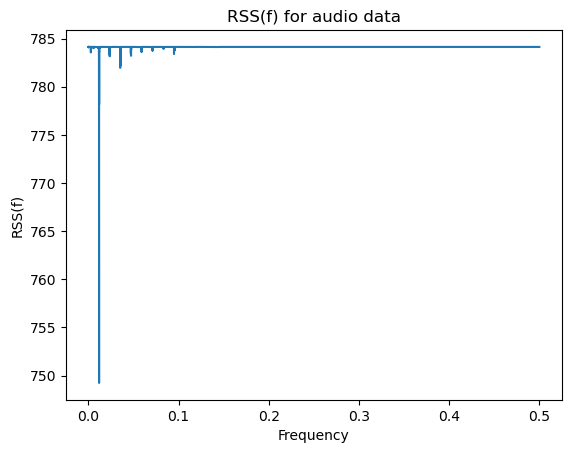

In [44]:
plt.plot(fourier_freq, rss_fft)
plt.title('RSS(f) for audio data')
plt.xlabel('Frequency')
plt.ylabel('RSS(f)')
plt.show()

Let us compute the frequency which minimizes $RSS(f)$. 

In [45]:
fourier_freq = (np.arange(1, m+1))/(n)
best_freq = fourier_freq[np.argmin(rss_fft)]
print(best_freq)

0.011799968135107145


The frequency corresponding to the middle $C$ note on the piano is approximately 261.63 Hz (see e.g., https://en.wikipedia.org/wiki/C_(musical_note)). How does 261.63 Hz relate to the periodogram maximizing frequency (or, equivalently, RSS minimizing frequency) above? The connection between the two is obtained by multiplication by the sampling rate $sr$. The sinusoid $\cos (2 \pi f t)$ completes $f$ cycles in unit time. In this dataset, one unit of time is given by $1/sr$ seconds. So this sinusoid completes $f \times sr$ cycles in one sec which means that, in Hertz (which is the number of cycles per second), the frequency $f$ corresponds to $f \times sr$.  

In [46]:
print(best_freq * sr) #this is quite close to 261.63 Hz. 

260.18929737911253
